<a href="https://colab.research.google.com/github/CJYJas/SelfLearn_2025/blob/main/Breast_Cancer_Classification_(Binary_Classfication).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict whether a tumor is maglinant or benign based on various medical features

In [ ]:
#Data info
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'target')

#check shape and types
print(X.shape)
print(X.head())
print(y.value_counts())

(569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0 

In [ ]:
#Data exploration
print(X.info())
print(X.describe())
print("Target Distribution")
print(y.value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

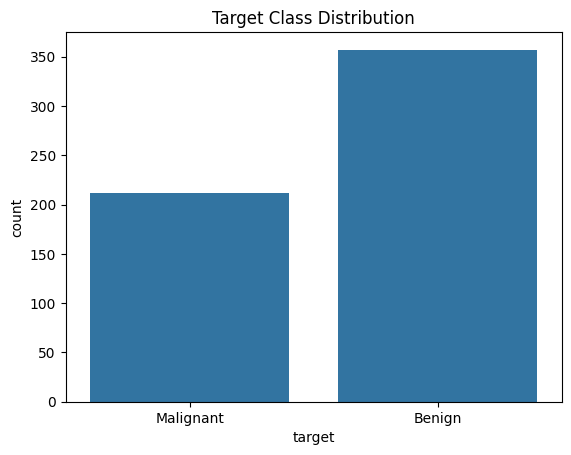

target
1    357
0    212
Name: count, dtype: int64


In [ ]:
#Explore Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'target')
df = X.copy()
df['target'] = y

#Target balance
sns.countplot(x = 'target', data = df)
plt.xticks([0,1], ['Malignant', 'Benign'])
plt.title('Target Class Distribution')
plt.show()
print(df['target'].value_counts())

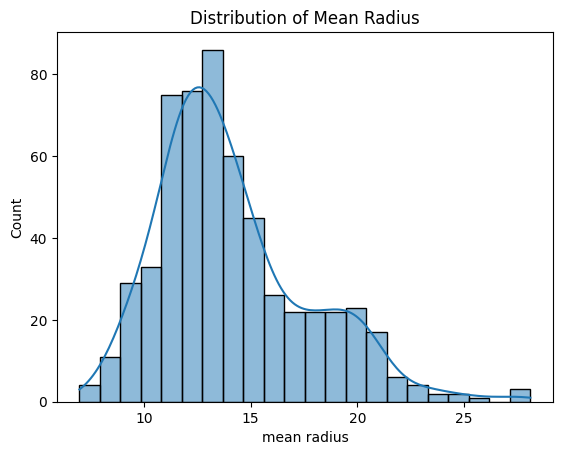

In [ ]:
#Mean radius
sns.histplot(df['mean radius'], kde = True)
plt.title("Distribution of Mean Radius")
plt.show()

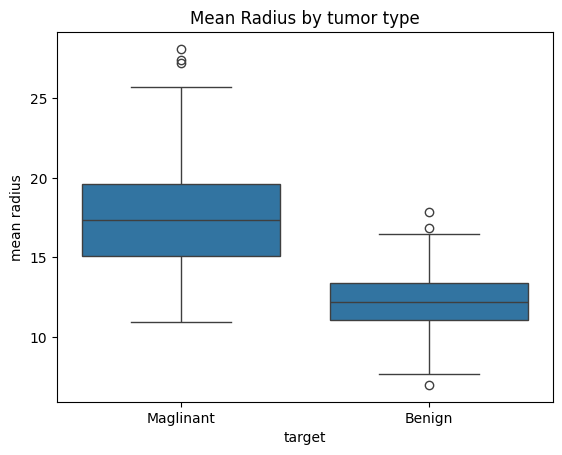

In [ ]:
#Compare feature by target class
sns.boxplot(x = 'target', y = 'mean radius', data = df)
plt.xticks([0,1], ['Maglinant', 'Benign'])
plt.title('Mean Radius by tumor type')
plt.show()

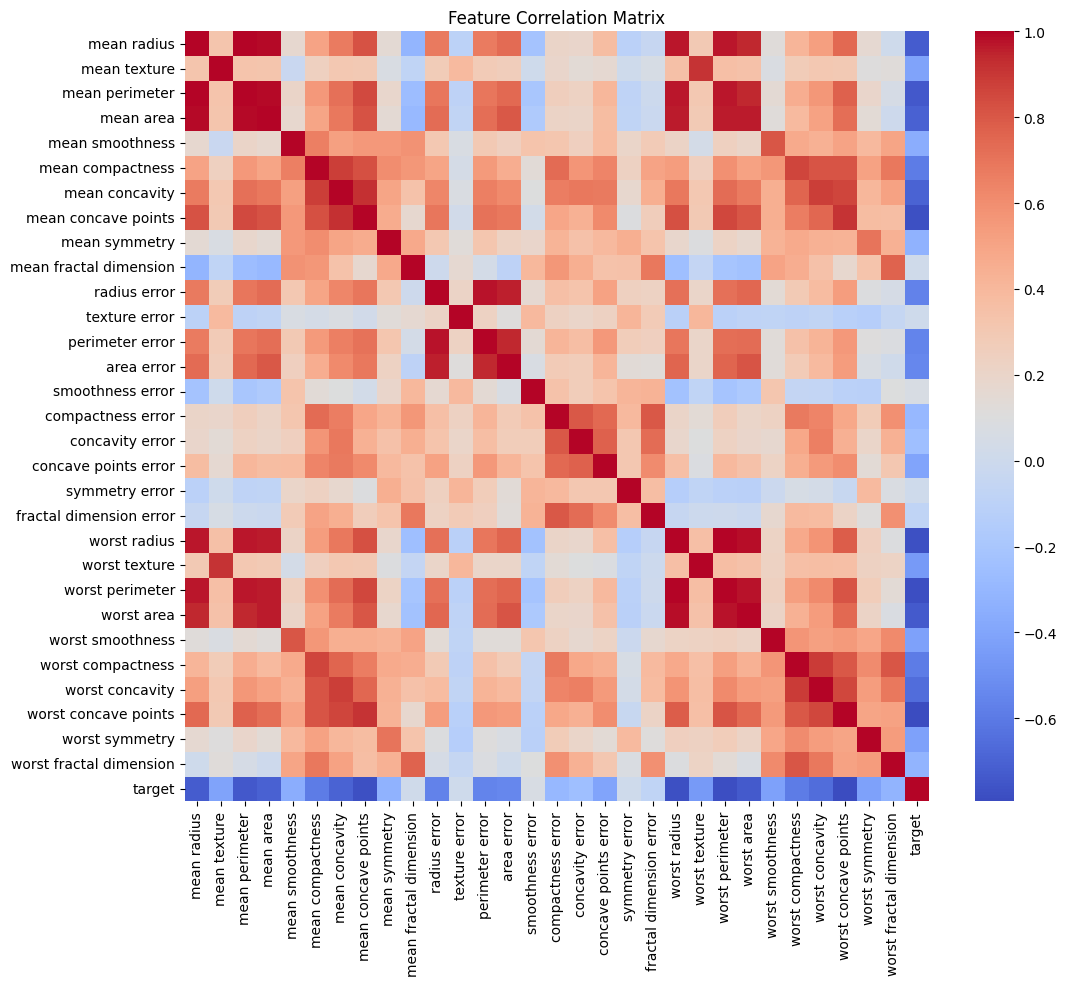

In [ ]:
#Correlation Matrix
plt.figure(figsize = (12, 10))
corr = df.corr()
sns.heatmap(corr, cmap ='coolwarm', annot = False)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
#Preprocessing & Train-Test-Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = 'target')
y = df['target']

#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#confirm shape
print("X_train shape : ", X_train_scaled.shape)
print("X_test shape :", X_test_scaled.shape)
print("y_train shape : ", y_train.shape)
print("y_test_shape :", y_test.shape)

X_train shape :  (455, 30)
X_test shape : (114, 30)
y_train shape :  (455,)
y_test_shape : (114,)


In [ ]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter = 1000, random_state = 42)
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train_scaled, y_train)
dtc_predict = dtc.predict(X_test_scaled)

print("LogisticRegression Accuracy Score : ", accuracy_score(y_test, lr_predict))
print("Decision Tree classifier Accuracy Score : ", accuracy_score(y_test, dtc_predict))

LogisticRegression Accuracy Score :  0.9824561403508771
Decision Tree classifier Accuracy Score :  0.9122807017543859


Confusion Matrix for LogisticRegression : [[41  1]
 [ 1 71]]


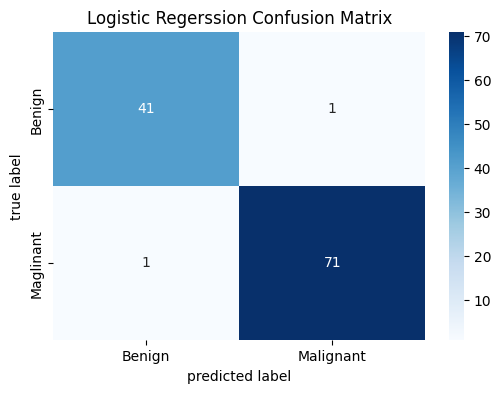

Confusion Matrix for DecisionTreeClassifier : [[39  3]
 [ 7 65]]


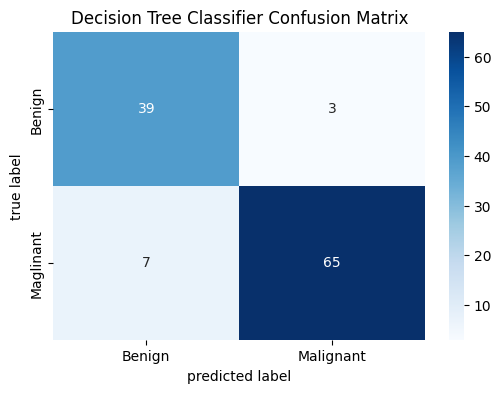

Classfication report for Logistic Regression : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classfication report for Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Confusion Matrix for LogisticRegression :", confusion_matrix(y_test, lr_predict))
cm_lr = confusion_matrix(y_test, lr_predict)
plt.figure(figsize = (6,4))
sns.heatmap(cm_lr, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Maglinant'])
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("Logistic Regerssion Confusion Matrix")
plt.show()

print("Confusion Matrix for DecisionTreeClassifier :", confusion_matrix(y_test, dtc_predict))
cm_dtc = confusion_matrix(y_test, dtc_predict)
plt.figure(figsize = (6,4))
sns.heatmap(cm_dtc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Maglinant'])
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

print("Classfication report for Logistic Regression : \n", classification_report(y_test, lr_predict))
print("Classfication report for Decision Tree Classifier : \n", classification_report(y_test, dtc_predict))

Train Accuracy: 0.978021978021978
Test Accuracy: 0.9210526315789473

Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

   Malignant       0.88      0.90      0.89        42
      Benign       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



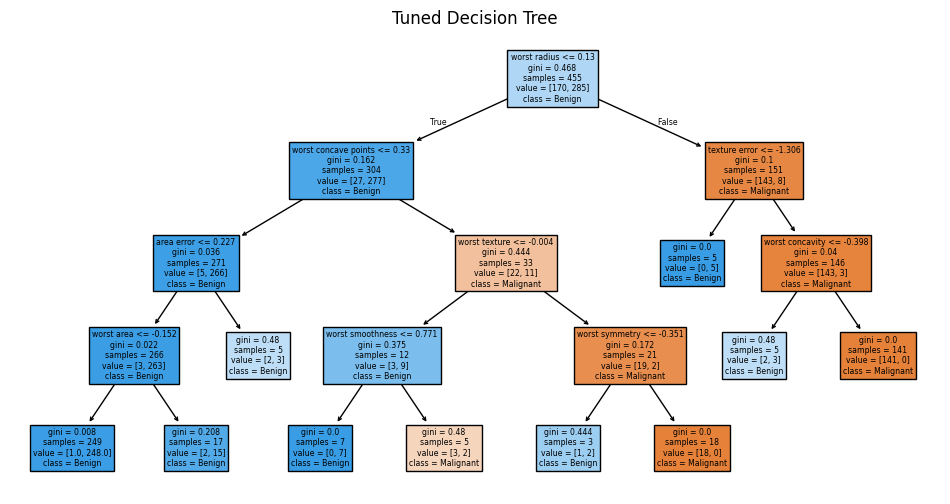

In [ ]:
#Tuning for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Tune parameters
dtree_tuned = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

# Fit model
dtree_tuned.fit(X_train_scaled, y_train)

# Predict
tuned_pred = dtree_tuned.predict(X_test_scaled)

# Accuracy
print("Train Accuracy:", dtree_tuned.score(X_train_scaled, y_train))
print("Test Accuracy:", accuracy_score(y_test, tuned_pred))

# Classification report
print("\nClassification Report (Tuned Decision Tree):")
print(classification_report(y_test, tuned_pred, target_names=['Malignant', 'Benign']))

from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(dtree_tuned, feature_names=X.columns, class_names=['Malignant', 'Benign'], filled=True)
plt.title("Tuned Decision Tree")
plt.show()


Accuracy Score : 0.956140350877193
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix for KNN : [[39  3]
 [ 2 70]]


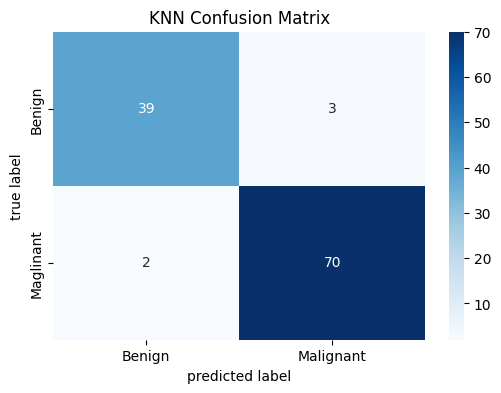

In [ ]:
#K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

print("Confusion Matrix for KNN :", confusion_matrix(y_test, y_pred))
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Maglinant'])
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("KNN Confusion Matrix")
plt.show()


In [ ]:
#Model Comparison

from sklearn.metrics import accuracy_score, f1_score

#Store model names and metrics
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']

test_accuracy = [
    accuracy_score(y_test, lr_predict),
    accuracy_score(y_test, dtc_predict),
    accuracy_score(y_test, y_pred)
]

f1_scores = [
    f1_score(y_test, lr_predict),
    f1_score(y_test, dtc_predict),
    f1_score(y_test, y_pred)
]

print(f"{'Model':<20} {'Test Acc':<10} {'F1 Score':<10}")
for i in range(len(model_names)):
    print(f"{model_names[i]:<20} {test_accuracy[i]:<10.3f} {f1_scores[i]:<10.3f}")

Model                Test Acc   F1 Score  
Logistic Regression  0.982      0.986     
Decision Tree        0.912      0.929     
KNN                  0.956      0.966     


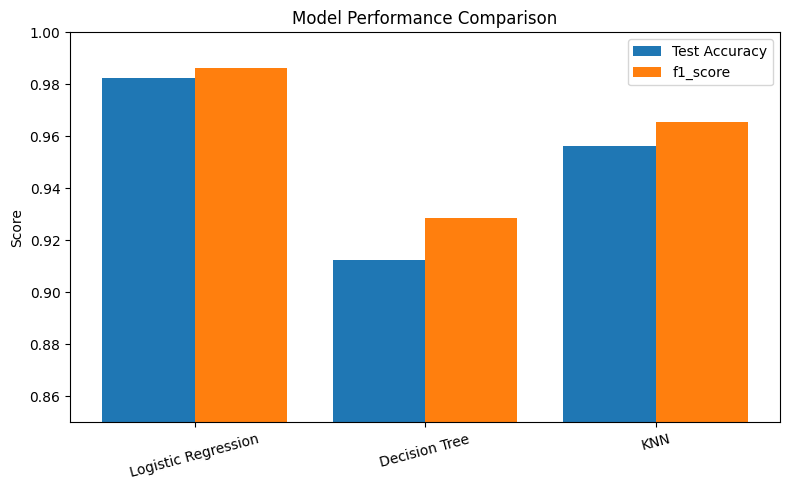

In [ ]:
#bar chart for visual comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
x = range(len(model_names))
plt.bar(x, test_accuracy, width = 0.4, label = 'Test Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width = 0.4, label = 'f1_score', align = 'center')

plt.xticks([i + 0.2 for i in x], model_names, rotation = 15)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0.85, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

Test Accuracy :  0.956140350877193
Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



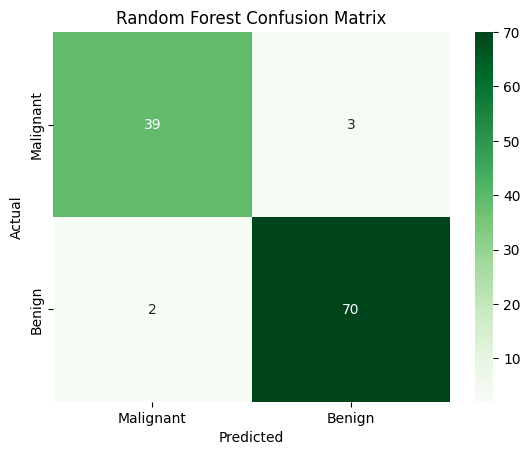

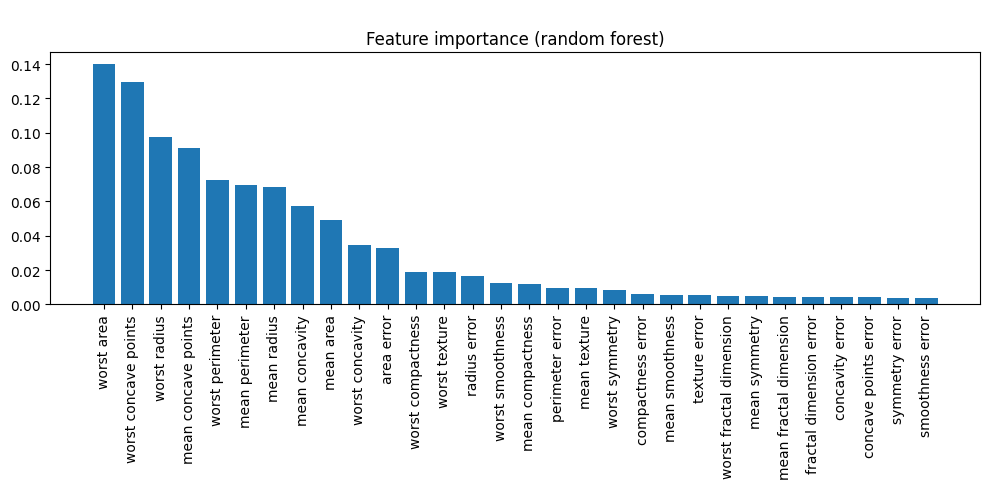

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Train Random Forest
rf = RandomForestClassifier(n_estimators= 100, max_depth= 10, random_state= 42)
rf.fit(X_train_scaled, y_train)
rf_predict = rf.predict(X_test_scaled)

print("Test Accuracy : ", accuracy_score(y_test, rf_predict))
print("Classification report : \n", classification_report(y_test, rf_predict))

cm = confusion_matrix(y_test, rf_predict)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', xticklabels = ['Malignant', 'Benign'], yticklabels = ['Malignant', 'Benign'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10, 5))
plt.title("\nFeature importance (random forest)")
plt.bar(range(len(importances)), importances[indices], align = 'center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
#MinMax & Robust

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#MinMaxScaler
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

log_minmax = LogisticRegression(max_iter = 1000)
log_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = log_minmax.predict(X_test_minmax)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred_minmax))

# RobustScaler
robust = RobustScaler()
X_train_robust = robust.fit_transform(X_train)
X_test_robust = robust.transform(X_test)

log_robust = LogisticRegression(max_iter=1000)
log_robust.fit(X_train_robust, y_train)
y_pred_robust = log_robust.predict(X_test_robust)

print("RobustScaler - Test Accuracy:", accuracy_score(y_test, y_pred_robust))
print(classification_report(y_test, y_pred_robust))


Accuracy Score :  0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

RobustScaler - Test Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## ✅ Final Summary & Conclusion

In this project, we aimed to classify breast cancer tumors as either malignant or benign using various machine learning models.

### 🔍 Models Used:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest

### ⚙️ Preprocessing:
We compared **MinMaxScaler** and **RobustScaler**. RobustScaler slightly outperformed in terms of accuracy.

### 🏆 Best Performing Model:
- **Model:** Random Forest & LogisticRegression
- **Accuracy:** 0.98
- **F1 Score:** 0.98

This project demonstrates a full ML pipeline — from data loading to model evaluation — and gives us a solid baseline for future improvement.
